[View in Colaboratory](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb)

# Hello Deep Learning: Classify fashion_mnist data with a simple CNN in Keras

### Notebook Overview
<br> By Margaret Maynard-Reid, 4/24/2018
<br> **Notebook location on github**: https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb

This is a tutorial of how to classify **fashion_mnist** data with a simple **Convolutional Neural Network** in Keras (with TensorFlow as the backend)

The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) data: 
60,000 train and 10,000 test data with 10 categories:

<br> **Label**	**Description**
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot

Each gray-scale image is 28x28

>[Classify fashion_mnist data with a simple CNN in Keras](#scrollTo=r2NPAI4jZZgi)

>>>[Notebook Overview](#scrollTo=Ixyte299ZZgk)

>>>[Import the fashion_mnist data](#scrollTo=LbCigZtNZZgl)

>>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>>[Split the data into train/validation/test data sets](#scrollTo=CFlNHktHBtru)

>>>[Create the model architecture](#scrollTo=HhalcO03ZZg3)

>>>[Compile the model](#scrollTo=FhxJ5dinZZg8)

>>>[Train the model](#scrollTo=DtOvh3YVZZg_)

>>>[Load Model with best validation accuracy](#scrollTo=e-MGLwZQy05d)

>>>[Test Accuracy](#scrollTo=9RTRkan4yq5H)

>>>[Visualize prediction](#scrollTo=oJv7XEk10bOv)



### Import the fashion_mnist data

In [1]:
import keras

# Import the fashion_mnist data from keras datasets
from keras.datasets import fashion_mnist

# Load the pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

Using TensorFlow backend.


4423680/4422102 [==============================] - 5s 1us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


### Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


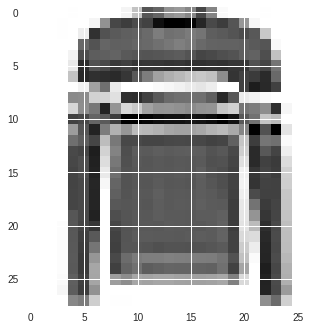

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Show the image in UI
plt.imshow(x_train[img_index])

### Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [25]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


### Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [26]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


### Create the model architecture

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
__________

### Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Train the model


In [29]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 224us/step - loss: 0.6778 - acc: 0.7488 - val_loss: 0.4274 - val_acc: 0.8494

Epoch 00001: val_loss improved from inf to 0.42742, saving model to model.weights.best.hdf5
Epoch 2/10
46400/55000 [========================>.....] - ETA: 1s - loss: 0.4733 - acc: 0.8261

55000/55000 [==============================] - 12s 225us/step - loss: 0.4661 - acc: 0.8288 - val_loss: 0.3587 - val_acc: 0.8710

Epoch 00002: val_loss improved from 0.42742 to 0.35874, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 12s 223us/step - loss: 0.4204 - acc: 0.8459 - val_loss: 0.3347 - val_acc: 0.8792

Epoch 00003: val_loss improved from 0.35874 to 0.33468, saving model to model.weights.best.hdf5
Epoch 4/10
12352/55000 [=====>........................] - ETA: 9s - loss: 0.4001 - acc: 0.8552

55000/55000 [==============================] - 12s 224us/step - loss: 0.3902 - acc: 0.8587 - val_loss: 0.3153 - val_acc: 0.8876

Epoch 00004: val_loss improved from 0.33468 to 0.31529, saving model to model.weights.best.hdf5
Epoch 5/10
55000/55000 [==============================] - 12s 224us/step - loss: 0.3718 - acc: 0.8627 - val_loss: 0.2989 - val_acc: 0.8904

Epoch 00005: val_loss improved from 0.31529 to 0.29886, saving model to model.weights.best.hdf5
Epoch 6/10
 7232/55000 [==>...........................] - ETA: 10s - loss: 0.3553 - acc: 0.8703

55000/55000 [==============================] - 12s 224us/step - loss: 0.3569 - acc: 0.8689 - val_loss: 0.2822 - val_acc: 0.8978

Epoch 00006: val_loss improved from 0.29886 to 0.28221, saving model to model.weights.best.hdf5
Epoch 7/10
55000/55000 [==============================] - 12s 224us/step - loss: 0.3461 - acc: 0.8725 - val_loss: 0.2757 - val_acc: 0.9012

Epoch 00007: val_loss improved from 0.28221 to 0.27565, saving model to model.weights.best.hdf5
Epoch 8/10
 6464/55000 [==>...........................] - ETA: 10s - loss: 0.3371 - acc: 0.8795

55000/55000 [==============================] - 12s 224us/step - loss: 0.3338 - acc: 0.8775 - val_loss: 0.2685 - val_acc: 0.9004

Epoch 00008: val_loss improved from 0.27565 to 0.26847, saving model to model.weights.best.hdf5
Epoch 9/10
55000/55000 [==============================] - 12s 222us/step - loss: 0.3304 - acc: 0.8799 - val_loss: 0.2621 - val_acc: 0.9080

Epoch 00009: val_loss improved from 0.26847 to 0.26213, saving model to model.weights.best.hdf5
Epoch 10/10
 6464/55000 [==>...........................] - ETA: 10s - loss: 0.3047 - acc: 0.8878

55000/55000 [==============================] - 12s 222us/step - loss: 0.3187 - acc: 0.8827 - val_loss: 0.2504 - val_acc: 0.9080

Epoch 00010: val_loss improved from 0.26213 to 0.25037, saving model to model.weights.best.hdf5


### Load Model with best validation accuracy

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

###Test Accuracy

In [31]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9001


### Visualize prediction
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label)

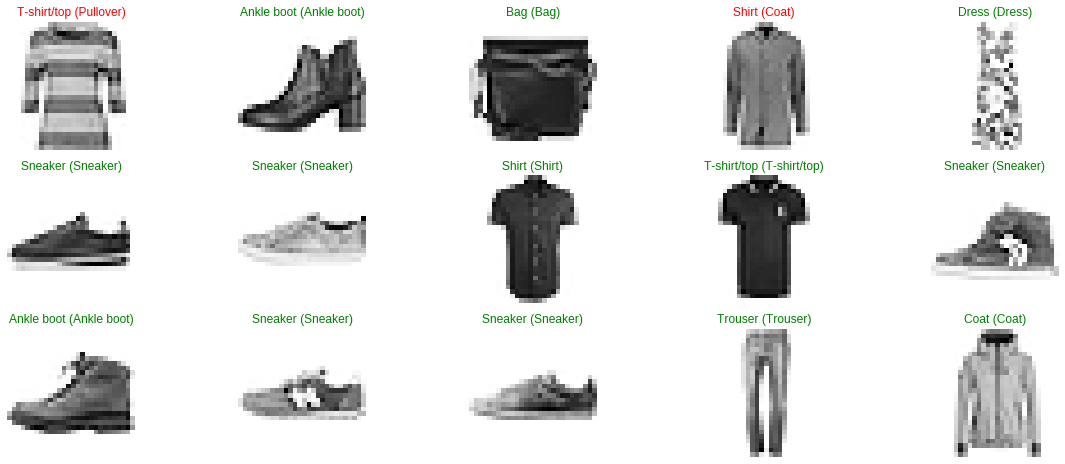

In [40]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))